In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
from pmdarima import utils
from pmdarima import arima
from pmdarima import model_selection
from sklearn.metrics import mean_absolute_error
from statistics import mean 

/Users/kainagasawa/miniforge3/envs/env_ds1/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import os

path = "/Users/kainagasawa/Desktop/momentum/data"


files = os.listdir(path)
print(files)      
print(len(files))

['MSFT_HistoricalData.csv', 'PFE_HistoricalData.csv', 'AMZN_HistoricalData.csv', 'CVX_HistoricalData.csv', 'JPM_HistoricalData.csv', '.DS_Store', 'BRKb_HistoricalData.csv', 'UNH_HistoricalData.csv', 'AAPL_HistoricalData.csv', 'NVDA_HistoricalData.csv', 'BAC_HistoricalData.csv', 'HD_HistoricalData.csv', 'XOM_HistoricalData.csv', 'DIS_HistoricalData.csv', 'COST_HistoricalData.csv', 'GOOGL_HistoricalData.csv', 'JNJ_HistoricalData.csv', 'KO_HistoricalData.csv', 'MA_HistoricalData.csv', 'PG_HistoricalData.csv']
20


In [3]:
data_ms = pd.read_csv (r'/Users/kainagasawa/Desktop/momentum/data/MSFT_HistoricalData.csv')   
df_ms = pd.DataFrame(data_ms)
df_ms['Change %']=df_ms['Change %'].str.replace('%','')
df_ms['Change %']=df_ms['Change %'].str.replace('−', '-').astype(float)
df_ms=df_ms[::-1].reset_index(drop=True)

In [4]:
df_ms.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %    float64
dtype: object

In [5]:
df_ms

,Date,Price,Open,High,Low,Vol.,Change %
0,Aug 07,28.73,28.95,30.10,27.51,1.23B,-0.90
1,Sep 07,29.46,28.50,29.85,28.27,1.12B,2.54
2,Oct 07,36.81,29.46,37.00,29.29,1.77B,24.95
3,Nov 07,33.60,36.53,37.50,32.68,1.83B,-8.72
4,Dec 07,35.60,33.50,36.72,32.63,1.07B,5.95
...,...,...,...,...,...,...,...
175,Mar 22,308.31,296.40,315.95,270.00,734.35M,3.19
176,Apr 22,277.52,309.37,315.11,270.00,627.39M,-9.99
177,May 22,271.87,277.71,290.88,246.44,742.90M,-2.04
178,Jun 22,256.83,275.20,277.69,241.51,621.50M,-5.53


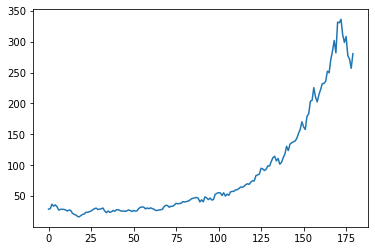

In [6]:
plt.plot(df_ms['Price'])

In [7]:
data_app = pd.read_csv (r'/Users/kainagasawa/Desktop/momentum/data/AAPL_HistoricalData.csv')   
df_ap = pd.DataFrame(data_app)
df_ap['Change %']=df_ap['Change %'].str.replace('%','')
df_ap['Change %']=df_ap['Change %'].str.replace('−', '-').astype(float)
df_ap=df_ap[::-1].reset_index(drop=True)

In [8]:
df_ap

,Date,Price,Open,High,Low,Vol.,Change %
0,Aug 07,4.95,4.77,4.99,3.99,24.37B,5.10
1,Sep 07,5.48,5.00,5.54,4.64,20.93B,10.71
2,Oct 07,6.78,5.52,6.79,5.46,23.28B,23.72
3,Nov 07,6.51,6.74,6.88,5.38,26.20B,-3.98
4,Dec 07,7.07,6.49,7.25,6.32,17.26B,8.60
...,...,...,...,...,...,...,...
175,Mar 22,174.61,164.69,179.61,150.10,2.18B,5.75
176,Apr 22,157.65,174.03,178.49,155.38,1.69B,-9.71
177,May 22,148.84,156.71,166.48,132.61,2.40B,-5.59
178,Jun 22,136.72,149.90,151.74,129.04,1.75B,-8.14


In [9]:
data_amz = pd.read_csv (r'/Users/kainagasawa/Desktop/momentum/data/AMZN_HistoricalData.csv')   
df_am = pd.DataFrame(data_amz)
df_am['Change %']=df_am['Change %'].str.replace('%','')
df_am['Change %']=df_am['Change %'].str.replace('−', '-').astype(float)
df_am=df_am[::-1].reset_index(drop=True)

In [10]:
df_am

,Date,Price,Open,High,Low,Vol.,Change %
0,Aug 07,4.00,3.90,4.04,3.50,3.51B,1.78
1,Sep 07,4.66,4.00,4.71,3.99,2.45B,16.50
2,Oct 07,4.46,4.67,5.05,4.16,4.64B,-4.29
3,Nov 07,4.53,4.39,4.57,3.83,3.60B,1.57
4,Dec 07,4.63,4.50,4.80,4.19,2.54B,2.21
...,...,...,...,...,...,...,...
175,Mar 22,163.00,152.73,170.83,133.57,1.63B,6.15
176,Apr 22,124.28,164.15,168.39,121.62,1.47B,-23.75
177,May 22,120.21,122.40,126.22,101.26,2.26B,-3.27
178,Jun 22,106.21,122.26,128.99,101.43,1.77B,-11.65


In [11]:
data_coca = pd.read_csv (r'/Users/kainagasawa/Desktop/momentum/data/KO_HistoricalData.csv')   
df_ko = pd.DataFrame(data_coca)
df_ko['Change %']=df_ko['Change %'].str.replace('%','')
df_ko['Change %']=df_ko['Change %'].str.replace('−', '-').astype(float)
df_ko=df_ko[::-1].reset_index(drop=True)

In [12]:
df_ko

,Date,Price,Open,High,Low,Vol.,Change %
0,Aug 07,26.89,26.18,28.43,26.09,464.97M,3.22
1,Sep 07,28.73,26.84,28.89,26.60,337.88M,6.84
2,Oct 07,30.88,28.80,31.07,28.46,368.86M,7.48
3,Nov 07,31.05,30.82,31.72,29.82,386.57M,0.55
4,Dec 07,30.68,31.05,32.16,30.61,302.70M,-1.19
...,...,...,...,...,...,...,...
175,Mar 22,62.00,62.14,63.02,57.50,426.93M,-0.39
176,Apr 22,64.61,62.33,67.20,61.72,319.60M,4.21
177,May 22,63.38,65.28,66.38,59.66,459.88M,-1.90
178,Jun 22,62.91,63.42,63.77,58.25,353.20M,-0.74


In [13]:
data_jpm = pd.read_csv (r'/Users/kainagasawa/Desktop/momentum/data/JPM_HistoricalData.csv')   
df_jp = pd.DataFrame(data_jpm)
df_jp['Change %']=df_jp['Change %'].str.replace('%','')
df_jp['Change %']=df_jp['Change %'].str.replace('−', '-').astype(float)
df_jp=df_jp[::-1].reset_index(drop=True)

In [14]:
df_jp.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %    float64
dtype: object

In [15]:
data_jnj = pd.read_csv (r'/Users/kainagasawa/Desktop/momentum/data/JNJ_HistoricalData.csv')   
df_jj = pd.DataFrame(data_jnj)
df_jj['Change %']=df_jj['Change %'].str.replace('%','')
df_jj['Change %']=df_jj['Change %'].str.replace('−', '-').astype(float)
df_jj=df_jj[::-1].reset_index(drop=True)

In [16]:
df_jj

,Date,Price,Open,High,Low,Vol.,Change %
0,Aug 07,61.79,60.51,62.98,60.31,331.10M,2.13
1,Sep 07,65.70,61.63,65.75,61.26,220.57M,6.33
2,Oct 07,65.17,65.66,66.80,63.55,232.89M,-0.81
3,Nov 07,67.74,64.80,68.75,63.73,284.89M,3.94
4,Dec 07,66.70,67.62,68.50,66.55,197.24M,-1.54
...,...,...,...,...,...,...,...
175,Mar 22,177.23,163.04,180.21,162.41,180.11M,7.69
176,Apr 22,180.46,177.05,186.69,175.52,163.46M,1.82
177,May 22,179.53,180.47,181.74,172.69,152.74M,-0.52
178,Jun 22,177.51,179.15,183.35,167.26,159.33M,-1.13


In [17]:
data_cvx = pd.read_csv (r'/Users/kainagasawa/Desktop/momentum/data/CVX_HistoricalData.csv')   
df_cv = pd.DataFrame(data_cvx)
df_cv['Change %']=df_cv['Change %'].str.replace('%','')
df_cv['Change %']=df_cv['Change %'].str.replace('−', '-').astype(float)
df_cv=df_cv[::-1].reset_index(drop=True)

In [18]:
df_cv

,Date,Price,Open,High,Low,Vol.,Change %
0,Aug 07,87.76,84.77,89.50,78.25,292.12M,2.93
1,Sep 07,93.58,87.19,95.50,85.91,184.66M,6.63
2,Oct 07,91.51,93.30,94.53,86.72,212.38M,-2.21
3,Nov 07,87.77,90.05,91.48,81.92,230.80M,-4.09
4,Dec 07,93.33,87.10,95.20,86.74,162.80M,6.33
...,...,...,...,...,...,...,...
175,Mar 22,162.83,145.01,174.76,144.70,527.49M,13.08
176,Apr 22,156.67,162.78,174.54,151.36,200.23M,-3.78
177,May 22,174.66,156.31,180.96,155.15,235.07M,11.48
178,Jun 22,144.78,176.73,182.40,140.15,251.81M,-17.11


In [19]:
data_pfe = pd.read_csv (r'/Users/kainagasawa/Desktop/momentum/data/PFE_HistoricalData.csv')   
df_pf = pd.DataFrame(data_pfe)
df_pf['Change %']=df_pf['Change %'].str.replace('%','')
df_pf['Change %']=df_pf['Change %'].str.replace('−', '-').astype(float)
df_pf=df_pf[::-1].reset_index(drop=True)

In [20]:
df_pf

,Date,Price,Open,High,Low,Vol.,Change %
0,Aug 07,23.55,22.29,23.70,21.93,1.03B,5.65
1,Sep 07,23.16,23.49,23.86,22.61,700.24M,-1.66
2,Oct 07,23.33,23.18,24.37,22.14,826.38M,0.73
3,Nov 07,22.52,23.30,23.32,21.08,912.28M,-3.47
4,Dec 07,21.55,22.39,23.22,21.51,720.36M,-4.31
...,...,...,...,...,...,...,...
175,Mar 22,51.77,46.69,55.30,45.44,718.12M,10.29
176,Apr 22,49.07,52.12,56.32,47.12,482.93M,-5.22
177,May 22,53.04,47.68,54.92,47.46,583.22M,8.09
178,Jun 22,52.43,53.25,54.56,46.28,449.24M,-1.15


In [21]:
data_brk = pd.read_csv (r'/Users/kainagasawa/Desktop/momentum/data/BRKb_HistoricalData.csv')   
df_br = pd.DataFrame(data_brk)
df_br['Change %']=df_br['Change %'].str.replace('%','')
df_br['Change %']=df_br['Change %'].str.replace('−', '-').astype(float)
df_br=df_br[::-1].reset_index(drop=True)

In [22]:
df_br

,Date,Price,Open,High,Low,Vol.,Change %
0,Aug 07,77.80,71.96,80.00,71.60,20.97M,7.94
1,Sep 07,79.04,77.96,80.00,77.62,13.78M,1.59
2,Oct 07,88.28,79.40,88.28,78.98,20.04M,11.69
3,Nov 07,93.80,88.00,93.96,87.34,28.29M,6.25
4,Dec 07,94.72,94.12,101.18,87.30,26.33M,0.98
...,...,...,...,...,...,...,...
175,Mar 22,352.91,319.55,360.00,313.60,6.00M,9.79
176,Apr 22,322.83,353.65,354.58,320.50,82.22M,-8.52
177,May 22,315.98,324.11,327.28,298.11,96.34M,-2.12
178,Jun 22,273.02,316.00,316.79,263.68,100.76M,-13.60


In [23]:
data_unh = pd.read_csv (r'/Users/kainagasawa/Desktop/momentum/data/UNH_HistoricalData.csv')   
df_un = pd.DataFrame(data_unh)
df_un['Change %']=df_un['Change %'].str.replace('%','')
df_un['Change %']=df_un['Change %'].str.replace('−', '-').astype(float)
df_un=df_un[::-1].reset_index(drop=True)

In [24]:
df_un

,Date,Price,Open,High,Low,Vol.,Change %
0,Aug 07,50.01,48.24,50.47,45.82,203.40M,3.26
1,Sep 07,48.43,50.11,50.75,48.00,139.85M,-3.16
2,Oct 07,49.15,48.87,49.98,46.59,195.46M,1.49
3,Nov 07,55.00,48.82,55.00,48.12,170.78M,11.90
4,Dec 07,58.20,54.30,59.46,53.90,146.12M,5.82
...,...,...,...,...,...,...,...
175,Mar 22,509.97,470.89,521.89,467.73,73.72M,7.17
176,Apr 22,508.55,510.68,553.29,504.53,61.46M,-0.28
177,May 22,496.78,510.81,513.51,463.33,68.00M,-2.31
178,Jun 22,513.63,498.32,518.70,449.70,84.92M,3.39


In [25]:
data_nvd = pd.read_csv (r'/Users/kainagasawa/Desktop/momentum/data/NVDA_HistoricalData.csv')   
df_nv = pd.DataFrame(data_nvd)
df_nv['Change %']=df_nv['Change %'].str.replace('%','')
df_nv['Change %']=df_nv['Change %'].str.replace('−', '-').astype(float)
df_nv=df_nv[::-1].reset_index(drop=True)

In [26]:
df_nv

,Date,Price,Open,High,Low,Vol.,Change %
0,Aug 07,8.53,7.52,8.56,6.75,1.57B,11.80
1,Sep 07,9.06,8.57,9.30,7.96,949.06M,6.21
2,Oct 07,8.85,9.14,9.92,8.14,1.07B,-2.32
3,Nov 07,7.88,8.71,9.55,7.28,1.21B,-10.96
4,Dec 07,8.51,8.00,9.10,7.84,758.46M,7.99
...,...,...,...,...,...,...,...
175,Mar 22,272.86,242.91,289.46,206.50,1.16B,11.90
176,Apr 22,185.47,273.75,275.58,182.90,1.11B,-32.03
177,May 22,186.72,185.41,204.00,155.67,1.38B,0.67
178,Jun 22,151.59,187.24,196.19,148.62,1.06B,-18.81


In [27]:
data_bac = pd.read_csv (r'/Users/kainagasawa/Desktop/momentum/data/BAC_HistoricalData.csv')   
df_ba = pd.DataFrame(data_bac)
df_ba['Change %']=df_ba['Change %'].str.replace('%','')
df_ba['Change %']=df_ba['Change %'].str.replace('−', '-').astype(float)
df_ba=df_ba[::-1].reset_index(drop=True)


In [28]:
df_ba

,Date,Price,Open,High,Low,Vol.,Change %
0,Aug 07,50.68,47.30,52.78,46.52,831.93M,6.87
1,Sep 07,50.27,50.62,51.93,48.60,430.94M,-0.81
2,Oct 07,48.28,50.04,52.96,46.45,536.31M,-3.96
3,Nov 07,46.13,46.75,47.00,41.73,770.46M,-4.45
4,Dec 07,41.26,46.25,47.00,40.61,590.64M,-10.56
...,...,...,...,...,...,...,...
175,Mar 22,41.22,43.71,44.63,38.17,1.31B,-6.74
176,Apr 22,35.68,41.69,41.74,35.54,1.03B,-13.44
177,May 22,37.20,36.03,38.75,32.96,1.11B,4.26
178,Jun 22,31.13,37.46,37.47,30.64,996.45M,-16.32


In [29]:
data_hd = pd.read_csv (r'/Users/kainagasawa/Desktop/momentum/data/HD_HistoricalData.csv')   
df_hd = pd.DataFrame(data_hd)
df_hd['Change %']=df_hd['Change %'].str.replace('%','')
df_hd['Change %']=df_hd['Change %'].str.replace('−', '-').astype(float)
df_hd=df_hd[::-1].reset_index(drop=True)

In [30]:
df_hd

,Date,Price,Open,High,Low,Vol.,Change %
0,Aug 07,38.31,36.94,38.54,31.85,769.38M,3.07
1,Sep 07,32.44,37.21,37.37,32.37,515.48M,-15.32
2,Oct 07,31.51,32.58,34.55,30.28,400.55M,-2.87
3,Nov 07,28.56,31.40,31.58,26.78,406.38M,-9.36
4,Dec 07,26.94,28.62,29.80,25.57,330.23M,-5.67
...,...,...,...,...,...,...,...
175,Mar 22,299.33,314.59,340.74,298.89,115.58M,-5.22
176,Apr 22,300.40,300.50,318.40,293.59,86.71M,0.36
177,May 22,302.75,301.99,315.75,279.59,105.31M,0.78
178,Jun 22,274.27,301.74,308.46,264.51,95.09M,-9.41


In [31]:
data_xom = pd.read_csv (r'/Users/kainagasawa/Desktop/momentum/data/XOM_HistoricalData.csv')   
df_xo = pd.DataFrame(data_xom)
df_xo['Change %']=df_xo['Change %'].str.replace('%','')
df_xo['Change %']=df_xo['Change %'].str.replace('−', '-').astype(float)
df_xo=df_xo[::-1].reset_index(drop=True)

In [32]:
df_xo

,Date,Price,Open,High,Low,Vol.,Change %
0,Aug 07,85.73,84.99,87.90,78.76,687.60M,0.70
1,Sep 07,92.56,85.31,93.66,83.88,446.29M,7.97
2,Oct 07,91.99,92.45,95.27,89.67,513.52M,-0.62
3,Nov 07,89.16,89.83,90.95,83.37,548.10M,-3.08
4,Dec 07,93.69,88.97,95.10,87.71,386.70M,5.08
...,...,...,...,...,...,...,...
175,Mar 22,82.59,78.77,91.50,76.25,853.55M,5.32
176,Apr 22,85.25,81.99,89.80,79.29,505.64M,3.22
177,May 22,96.00,85.01,99.78,83.40,659.84M,12.61
178,Jun 22,85.64,97.02,105.57,83.52,660.32M,-10.79


In [33]:
data_dis = pd.read_csv (r'/Users/kainagasawa/Desktop/momentum/data/DIS_HistoricalData.csv')   
df_di = pd.DataFrame(data_dis)
df_di['Change %']=df_di['Change %'].str.replace('%','')
df_di['Change %']=df_di['Change %'].str.replace('−', '-').astype(float)
df_di=df_di[::-1].reset_index(drop=True)

In [34]:
df_di

,Date,Price,Open,High,Low,Vol.,Change %
0,Aug 07,33.60,32.88,34.93,31.25,268.71M,1.82
1,Sep 07,34.39,33.51,34.95,33.00,173.34M,2.35
2,Oct 07,34.63,34.38,35.69,33.57,174.63M,0.70
3,Nov 07,33.15,34.51,34.71,30.68,219.62M,-4.27
4,Dec 07,32.28,33.06,33.50,31.71,193.47M,-2.62
...,...,...,...,...,...,...,...
175,Mar 22,137.16,147.86,148.65,128.38,225.76M,-7.61
176,Apr 22,111.63,137.34,139.26,111.36,274.46M,-18.61
177,May 22,110.44,111.71,116.44,99.47,323.01M,-1.07
178,Jun 22,94.40,112.01,112.85,92.01,241.46M,-14.52


In [35]:
data_cos = pd.read_csv (r'/Users/kainagasawa/Desktop/momentum/data/COST_HistoricalData.csv')   
df_co = pd.DataFrame(data_cos)
df_co['Change %']=df_co['Change %'].str.replace('%','')
df_co['Change %']=df_co['Change %'].str.replace('−', '-').astype(float)
df_co=df_co[::-1].reset_index(drop=True)

In [36]:
df_co

,Date,Price,Open,High,Low,Vol.,Change %
0,Aug 07,59.77,58.08,63.47,55.40,114.70M,3.27
1,Sep 07,59.40,59.97,60.73,54.29,89.67M,-0.62
2,Oct 07,65.10,59.55,68.29,59.20,119.50M,9.60
3,Nov 07,65.24,64.56,66.14,61.12,93.33M,0.22
4,Dec 07,67.52,65.24,70.35,63.01,95.67M,3.49
...,...,...,...,...,...,...,...
175,Mar 22,575.85,519.46,586.32,511.78,59.73M,10.90
176,Apr 22,531.72,577.38,612.27,529.70,49.75M,-7.66
177,May 22,466.22,532.23,546.14,406.51,80.77M,-12.32
178,Jun 22,479.28,469.38,491.13,443.20,54.38M,2.80


In [37]:
files

['MSFT_HistoricalData.csv',
 'PFE_HistoricalData.csv',
 'AMZN_HistoricalData.csv',
 'CVX_HistoricalData.csv',
 'JPM_HistoricalData.csv',
 '.DS_Store',
 'BRKb_HistoricalData.csv',
 'UNH_HistoricalData.csv',
 'AAPL_HistoricalData.csv',
 'NVDA_HistoricalData.csv',
 'BAC_HistoricalData.csv',
 'HD_HistoricalData.csv',
 'XOM_HistoricalData.csv',
 'DIS_HistoricalData.csv',
 'COST_HistoricalData.csv',
 'GOOGL_HistoricalData.csv',
 'JNJ_HistoricalData.csv',
 'KO_HistoricalData.csv',
 'MA_HistoricalData.csv',
 'PG_HistoricalData.csv']

In [38]:
data_goo = pd.read_csv (r'/Users/kainagasawa/Desktop/momentum/data/GOOGL_HistoricalData.csv')   
df_go = pd.DataFrame(data_goo)
df_go['Change %']=df_go['Change %'].str.replace('%','')
df_go['Change %']=df_go['Change %'].str.replace('−', '-').astype(float)
df_go=df_go[::-1].reset_index(drop=True)

In [39]:
df_go

,Date,Price,Open,High,Low,Vol.,Change %
0,Aug 07,12.89,12.77,13.18,12.02,1.77B,1.02
1,Sep 07,14.20,12.89,14.31,12.78,1.39B,10.16
2,Oct 07,17.69,14.26,17.69,14.25,3.11B,24.58
3,Nov 07,17.34,17.59,18.70,15.42,3.43B,-1.98
4,Dec 07,17.30,17.29,18.14,16.33,1.71B,-0.23
...,...,...,...,...,...,...,...
175,Mar 22,139.07,134.88,143.79,125.28,729.20M,2.97
176,Apr 22,114.11,139.50,143.71,112.74,761.18M,-17.95
177,May 22,113.76,113.41,122.85,101.88,850.45M,-0.31
178,Jun 22,108.96,114.86,119.35,105.05,770.87M,-4.22


In [40]:
data_ma = pd.read_csv (r'/Users/kainagasawa/Desktop/momentum/data/MA_HistoricalData.csv')   
df_ma = pd.DataFrame(data_ma)
df_ma['Change %']=df_ma['Change %'].str.replace('%','')
df_ma['Change %']=df_ma['Change %'].str.replace('−', '-').astype(float)
df_ma=df_ma[::-1].reset_index(drop=True)

In [41]:
df_ma

,Date,Price,Open,High,Low,Vol.,Change %
0,Aug 07,13.70,15.08,15.24,12.00,1.04B,-14.80
1,Sep 07,14.80,13.83,15.22,12.66,551.45M,8.03
2,Oct 07,18.99,14.77,19.48,14.31,902.02M,28.31
3,Nov 07,20.07,18.61,20.64,17.56,806.25M,5.69
4,Dec 07,21.52,20.00,22.72,19.45,687.45M,7.22
...,...,...,...,...,...,...,...
175,Mar 22,357.38,357.85,370.76,305.61,97.74M,-0.95
176,Apr 22,363.38,359.22,381.97,342.87,68.86M,1.68
177,May 22,357.87,363.00,369.24,312.77,75.03M,-1.52
178,Jun 22,315.48,358.20,368.31,303.65,65.07M,-11.85


In [42]:
data_pg = pd.read_csv (r'/Users/kainagasawa/Desktop/momentum/data/PG_HistoricalData.csv')   
df_pg = pd.DataFrame(data_pg)
df_pg['Change %']=df_pg['Change %'].str.replace('%','')
df_pg['Change %']=df_pg['Change %'].str.replace('−', '-').astype(float)
df_pg=df_pg[::-1].reset_index(drop=True)

In [43]:
df_pg

,Date,Price,Open,High,Low,Vol.,Change %
0,Aug 07,65.31,61.52,66.75,61.50,308.82M,5.58
1,Sep 07,70.34,65.04,70.73,64.89,204.38M,7.70
2,Oct 07,69.52,70.44,72.19,67.90,242.78M,-1.17
3,Nov 07,74.00,69.22,74.60,68.59,248.94M,6.44
4,Dec 07,73.42,74.00,75.18,72.52,188.29M,-0.78
...,...,...,...,...,...,...,...
175,Mar 22,152.80,154.31,156.47,143.03,170.28M,-1.98
176,Apr 22,160.55,153.52,164.90,151.26,151.99M,5.07
177,May 22,147.88,161.60,162.00,139.18,169.28M,-7.89
178,Jun 22,143.79,148.00,148.12,129.50,168.59M,-2.77


In [44]:
dfs=[df_ap, df_ms, df_am, df_go, df_nv, df_br, df_un, df_jj, df_jp,
     df_pg, df_xo, df_hd, df_cv, df_ma, df_ba, df_pf, df_co, df_di, df_ko]

df_name=['ap','ms','am','go','nv','br','un','jj','jp','pg','xo','hd','cv','ma','ba','pf','co','di','ko']
len(df_name)

19

In [45]:
re_dict={}
for d in range(len(df_name)):
    re_dict[df_name[d]]=np.log((dfs[d]['Change %']+100)/100)
    
rawre_dict={}
for d in range(len(df_name)):
    rawre_dict[df_name[d]]=(dfs[d]['Change %']+100)/100

In [205]:
#re_dict

In [206]:
#rawre_dict

In [209]:
np.log(df_pg['Price'][3]/df_pg['Price'][2])

0.062450612247033216

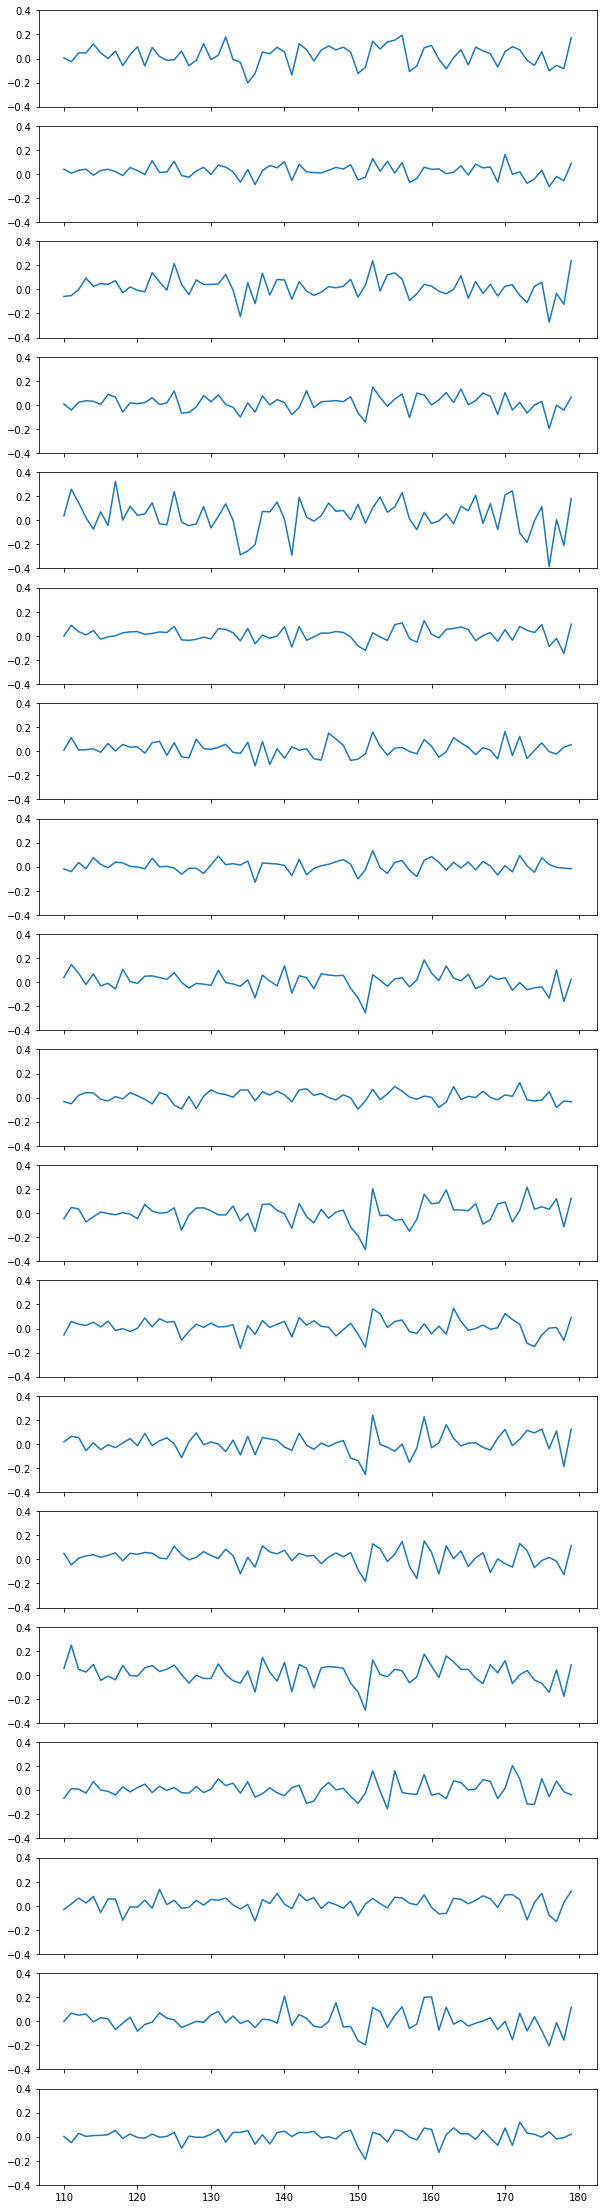

In [210]:
#plot of returns
fig, axes = plt.subplots(19, 1,sharex="all", sharey = "all", figsize=(10,40),squeeze=False, tight_layout=False)
keys=list(re_dict.keys())

for k in range(len(keys)):
    axes[k,0].plot((re_dict[keys[k]][110:]))
    axes[k,0].title.set_text(keys[k][110:])
    axes[k,0].set_ylim(-0.4, 0.4)
plt.show()


## time_series

In [211]:

total=[1+re_dict['ap'][i] for i in range(3)]

(np.prod(total)-1)

0.4027189517315193

In [212]:
key=list(re_dict.keys())
k

18

In [213]:
key=list(re_dict.keys())
value=[]
for n in key:
    cum_return=[1+re_dict[n][100+t-6] for t in range(6)]
    value.append(np.prod(cum_return)-1) 
    
value         

[-0.09903355553080262,
 0.13680254115999357,
 0.48765394253393257,
 0.3606660099691341,
 0.39137444226722584,
 -0.06784189818584996,
 -0.06458441712914509,
 0.004994615164557459,
 0.0075909425118412255,
 -0.05085627172051843,
 -0.04967046480026249,
 0.19372810606024093,
 -0.13099958754438368,
 0.05400501733681029,
 0.045319714405250844,
 -0.06969321169910792,
 0.12168736713050698,
 0.0054535750212572065,
 0.035867310651437334]

In [215]:
#time-series look back 3-month
    
win_t3={}
lose_t3={}

for i in range(3,len(dfs[0])):   
    
    key=list(re_dict.keys())
    value=[]
    for n in key:
        cum_return=[1+re_dict[n][i+t-3] for t in range(3)]
        value.append(np.prod(cum_return)-1)           
               
    r_dict=dict(zip(key,value))
    
    positive={}
    negative={}
    
    for j in key:
        if r_dict[j]>0:
            positive[j]=re_dict[j][i]
        else:
            negative[j]=re_dict[j][i]
            
    #win_return = sum(positive.values())
    #lose_return = sum(negative.values())

    win_t3[i-3]=list(positive.keys())
    lose_t3[i-3]=list(negative.keys())
            
   
     
#lose_t3

In [216]:
#time-series look back 6-month
    
win_t6={}
lose_t6={}

for i in range(6,len(dfs[0])):   
    
    key=list(re_dict.keys())
    value=[]
    for n in key:
        cum_return=[1+re_dict[n][i+t-6] for t in range(6)]
        value.append(np.prod(cum_return)-1)   
        
    r_dict=dict(zip(key,value))
    
    positive={}
    negative={}
    
    for j in key:
        if r_dict[j]>0:
            positive[j]=re_dict[j][i]
        else:
            negative[j]=re_dict[j][i]
            
    #win_return = sum(positive.values())
    #lose_return = sum(negative.values())

    win_t6[i-6]=list(positive.keys())
    lose_t6[i-6]=list(negative.keys())
            
    #wmlt.append(win_return-lose_return)
     
#win_t6

In [217]:
#time-series look back 9-month
    
win_t9={}
lose_t9={}

for i in range(9,len(dfs[0])):   
    
    key=list(re_dict.keys())
    value=[]
    for n in key:
        cum_return=[1+re_dict[n][i+t-9] for t in range(9)]
        value.append(np.prod(cum_return)-1)    
    r_dict=dict(zip(key,value))
    
    positive={}
    negative={}
    
    for j in key:
        if r_dict[j]>0:
            positive[j]=re_dict[j][i]
        else:
            negative[j]=re_dict[j][i]
            
        #win_return = sum(positive.values())
        #lose_return = sum(negative.values())

    win_t9[i-9]=list(positive.keys())

    lose_t9[i-9]=list(negative.keys())
            
    #wmlt.append(win_return-lose_return)
     
len(win_t9)

171

In [218]:
#decrare holdin period
holding=[3,6,9,12]

In [219]:
len(win_t3)
#t=3~t=179

177

In [221]:
win_t3[0]

['ap',
 'ms',
 'am',
 'go',
 'nv',
 'br',
 'un',
 'jj',
 'jp',
 'pg',
 'xo',
 'cv',
 'ma',
 'ba',
 'pf',
 'co',
 'di',
 'ko']

In [223]:
#returns for look back 3-month
t_returns3={}
for h in holding:
    returns_t=[]
    for i in range(len(win_t3)-h):
        winners=win_t3[i]
        losers=lose_t3[i]
        re_w=0
        re_l=0
        #j means holding periods 
       
        if len(winners)>0:
            value_w=[]
           
            for k in winners:
                raw_return=[rawre_dict[k][j+3] for j in range(h)]
                value_w.append(np.prod(raw_return)-1)
       
            re_w=sum(value_w)
        
        if len(losers)>0:
            value_l=[]
            for k in losers:
                raw_return=[rawre_dict[k][j+3] for j in range(h)]
                value_l.append(np.prod(raw_return)-1)           
            re_l=sum(value_l)
        
        returns_t.append(re_w-re_l)
    t_returns3[h]=returns_t

#t_returns3   

In [68]:
len(t_returns3[3])
#t=3~t=177 
#the first return is t=3~t=5, the last is t=177~t=179

174

In [224]:
#returns for look back 6-month

t_returns6={}
for h in holding:
    returns_t=[]
    for i in range(len(win_t6)-h):
        winners=win_t6[i]
        losers=lose_t6[i]
        re_w=0
        re_l=0
        #j means holding periods 
       
        if len(winners)>0:
            value_w=[]
           
            for k in winners:
                raw_return=[rawre_dict[k][j+6] for j in range(h)]
                value_w.append(np.prod(raw_return)-1)
       
            re_w=sum(value_w)
        
        if len(losers)>0:
            value_l=[]
            for k in losers:
                raw_return=[rawre_dict[k][j+6] for j in range(h)]
                value_l.append(np.prod(raw_return)-1)           
            re_l=sum(value_l)
        
        returns_t.append(re_w-re_l)
    t_returns6[h]=returns_t

#t_returns6 

In [225]:
#returns for look back 9-month

t_returns9={}
for h in holding:
    returns_t=[]
    for i in range(len(win_t9)-h):
        winners=win_t9[i]
        losers=lose_t9[i]
        re_w=0
        re_l=0
        #j means holding periods 
       
        if len(winners)>0:
            value_w=[]
           
            for k in winners:
                raw_return=[rawre_dict[k][j+9] for j in range(h)]
                value_w.append(np.prod(raw_return)-1)
       
            re_w=sum(value_w)
        
        if len(losers)>0:
            value_l=[]
            for k in losers:
                raw_return=[rawre_dict[k][j+9] for j in range(h)]
                value_l.append(np.prod(raw_return)-1)           
            re_l=sum(value_l)
        
        returns_t.append(re_w-re_l)
    t_returns9[h]=returns_t

#t_returns9

In [226]:
#returns for look back n-month

def n_returns(winner,loser,n,hold):
    returns={}
    for h in hold:
        returns_t=[]
        for i in range(len(winner)-h):
            winners=winner[i]
            losers=loser[i]
            re_w=0
            re_l=0
            #
            if len(winners)>0:
                value_w=[]
                #j means holding periods 
                for k in winners:
                    raw_return=[rawre_dict[k][j+n] for j in range(h)]
                    value_w.append(np.prod(raw_return)-1)
       
                re_w=sum(value_w)
        
            if len(losers)>0:
                value_l=[]
                for k in losers:
                    raw_return=[rawre_dict[k][j+n] for j in range(h)]
                    value_l.append(np.prod(raw_return)-1)           
                re_l=sum(value_l)
        
            returns_t.append(re_w-re_l)
        returns[h]=returns_t
    return returns


In [227]:
#calculate average return
def ave_return(returns,hold):
    average_re={}
    for i in hold:
        average_re[i]=sum(returns[i])/len(returns[i])*100
    return average_re

In [228]:
ave_return(t_returns6,holding)

{3: 6.833759746736778,
 6: -63.817938688007395,
 9: -155.160615304849,
 12: -203.80689873204614}

In [229]:
#look back=3, holding3,6,9,12 average return
t_average_re3=ave_return(t_returns3,holding)
t_average_re3

{3: -36.60997039797817,
 6: -37.326699101527005,
 9: -89.41779201710965,
 12: -155.37784662396078}

In [230]:
#look back=6, holding3,6,9,12 average return
t_average_re6=ave_return(t_returns6,holding)
t_average_re6

{3: 6.833759746736778,
 6: -63.817938688007395,
 9: -155.160615304849,
 12: -203.80689873204614}

In [231]:
#look back=9, holding3,6,9,12 average return
t_average_re9=ave_return(t_returns9,holding)
t_average_re9

{3: -87.06969145983805,
 6: -184.4202360814013,
 9: -240.663225130453,
 12: -176.98658881698665}

In [77]:
len(t_average_re9)

4

In [232]:
def ave_returns(returns_3,returns_6,returns_9,hold):
    total=0
    for i in hold:
        total+=returns_3[i]+returns_6[i]+returns_9[i]
    average=total/(len(returns_3)+len(returns_6)+len(returns_9))  
    return average

In [233]:
ave_re_t=ave_returns(t_average_re3,t_average_re6,t_average_re9,holding)
ave_re_t

-118.65197855061837

In [234]:
#t_returns6[3]

In [235]:
from scipy.stats import kurtosis,skew
print(kurtosis(t_returns6[3]))
print(skew(t_returns6[3]))

0.14393796255564428
0.4743056472428121


In [236]:
def hundred(li):
    new_list=[x*100 for x in li]
    return new_list

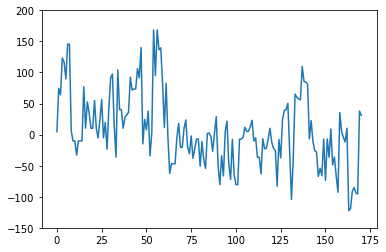

In [237]:
t63=hundred(t_returns6[3])

plt.plot(t63)
plt.ylim(-150,200)
plt.show()

## cross-sectional

In [239]:
#cross_sectional select 3 stock
#look back 3 month


win_c3={}
lose_c3={}

for i in range(3,len(df_am)):
    
    key=list(re_dict.keys())
    value=[]
    for n in key:
        cum_return=[1+re_dict[n][i+t-3] for t in range(3)]
        value.append(np.prod(cum_return)-1)         
               
    r_dict=dict(zip(key,value))
    
    winners={}
    losers={}
    
    r_dict=dict(sorted(r_dict.items(), key=lambda item: item[1]))
    key_s=list(r_dict.keys())
    value_s=list(r_dict.values())
    
    for j in range(3):
        winners[key_s[-(j+1)]]=value_s[-(j+1)]
        losers[key_s[j]]=value_s[j]
        
    #win_return = sum(winners.values())
    #lose_return = sum(losers.values())

    win_c3[i-3]=list(winners.keys()) 
    lose_c3[i-3]=list(losers.keys())
            
    
len(win_c3)

177

In [240]:
#cross_sectional select 3 stock
#look back 6 month

win_c6={}
lose_c6={}

for i in range(6,len(df_am)):
    
    key=list(re_dict.keys())
    value=[]
    for n in key:
        cum_return=[1+re_dict[n][i+t-6] for t in range(6)]
        value.append(np.prod(cum_return)-1)    
               
    r_dict=dict(zip(key,value))
    
    winners={}
    losers={}
    
    r_dict=dict(sorted(r_dict.items(), key=lambda item: item[1]))
    key_s=list(r_dict.keys())
    value_s=list(r_dict.values())
    
    for j in range(3):
        winners[key_s[-(j+1)]]=value_s[-(j+1)]
        losers[key_s[j]]=value_s[j]
        
    #win_return = sum(winners.values())
    #lose_return = sum(losers.values())

    win_c6[i-6]=list(winners.keys()) 
    lose_c6[i-6]=list(losers.keys())
            
   



In [241]:
#cross_sectional select 3 stock
#look back 9 month

win_c9={}
lose_c9={}

for i in range(9,len(df_am)):
    
    key=list(re_dict.keys())
    value=[]
    for n in key:
        cum_return=[1+re_dict[n][i+t-9] for t in range(9)]
        value.append(np.prod(cum_return)-1)   
        
    r_dict=dict(zip(key,value))
    
    winners={}
    losers={}
    
    r_dict=dict(sorted(r_dict.items(), key=lambda item: item[1]))
    key_s=list(r_dict.keys())
    value_s=list(r_dict.values())
    
    for j in range(3):
        winners[key_s[-(j+1)]]=value_s[-(j+1)]
        losers[key_s[j]]=value_s[j]
        
    #win_return = sum(winners.values())
    #lose_return = sum(losers.values())

    win_c9[i-9]=list(winners.keys()) 
    lose_c9[i-9]=list(losers.keys())
            
    

len(win_c9)

171

In [242]:
#returns for look back 3-month
c_returns3=n_returns(win_c3,lose_c3,3,holding)
#c_returns3

In [243]:
#returns for look back 6-month
c_returns6=n_returns(win_c6,lose_c6,6,holding)
#c_returns6

In [244]:
#returns for look back 9-month
c_returns9=n_returns(win_c9,lose_c9,9,holding)
#c_returns9

In [245]:
#look back=3, holding3,6,9,12 average return
c_average_re3=ave_return(c_returns3,holding)
c_average_re3

{3: -6.105160039780468,
 6: -3.7784364911513046,
 9: -3.422157335435652,
 12: -13.72684197490275}

In [246]:
#look back=3, holding3,6,9,12 average return
c_average_re6=ave_return(c_returns6,holding)
c_average_re6

{3: 4.279104798288899,
 6: 0.016989550255515153,
 9: -15.924433411344136,
 12: -9.558993412293548}

In [247]:
#look back=9, holding3,6,9,12 average return
c_average_re9=ave_return(c_returns9,holding)
c_average_re9

{3: -2.376347034054162,
 6: -16.897639688484308,
 9: -8.43278030752635,
 12: 19.85275306976849}

In [248]:
ave_returns(c_average_re3,c_average_re6,c_average_re9,holding)

-4.6728285230549815

In [249]:
ave_re_c=ave_returns(c_average_re3,c_average_re6,c_average_re9,holding)
ave_re_c

-4.6728285230549815

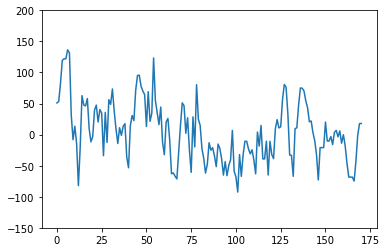

In [250]:
c63=hundred(c_returns6[3])

plt.plot(c63)
plt.ylim(-150,200)
plt.show()

In [251]:
print(kurtosis(c63))
print(skew(c63))

-0.17124076786842668
0.432639198093669


## Dual

In [253]:
#dual look back 3-month
    
win_d3={}
lose_d3={}

for i in range(3,len(dfs[0])):   
    
    key=list(re_dict.keys())
    value=[]
    for n in key:
        cum_return=[1+re_dict[n][i+t-3] for t in range(3)]
        value.append(np.prod(cum_return)-1)              
               
    r_dict=dict(zip(key,value))
    
    positive={}
    negative={}
    
    for j in key:
        if r_dict[j]>0:
            positive[j]=re_dict[j][i]
        else:
            negative[j]=re_dict[j][i]
            
    winners={}
    losers={}
    
    p_dict=dict(sorted(positive.items(), key=lambda item:item[1]))
    n_dict=dict(sorted(negative.items(), key=lambda item:item[1]))
    key_p=list(p_dict.keys())
    value_p=list(p_dict.values())
    key_n=list(n_dict.keys())
    value_n=list(n_dict.values())
    
    if len(key_p)>=3:
        for j in range(3):
            winners[key_p[-(j+1)]]=value_p[-(j+1)]   
    else:
        for j in range(len(key_p)):
            winners[key_p[-(j+1)]]=value_p[-(j+1)]
    if len(key_n)>=3:
        for j in range(3):
            losers[key_n[j]]=value_n[j]
    else:
        for j in range(len(key_n)):
            losers[key_n[j]]=value_n[j]
    
    win_d3[i-3]=list(winners.keys())
    lose_d3[i-3]=list(losers.keys())
            
   
     
#lose_d3

In [254]:
#dual look back 6-month
    
win_d6={}
lose_d6={}

for i in range(6,len(dfs[0])):   
    
    key=list(re_dict.keys())
    value=[]
    for n in key:
        cum_return=[1+re_dict[n][i+t-6] for t in range(6)]
        value.append(np.prod(cum_return)-1) 
        
    r_dict=dict(zip(key,value))
    
    positive={}
    negative={}
    
    for j in key:
        if r_dict[j]>0:
            positive[j]=re_dict[j][i]
        else:
            negative[j]=re_dict[j][i]
            
    winners={}
    losers={}
    
    p_dict=dict(sorted(positive.items(), key=lambda item:item[1]))
    n_dict=dict(sorted(negative.items(), key=lambda item:item[1]))
    key_p=list(p_dict.keys())
    value_p=list(p_dict.values())
    key_n=list(n_dict.keys())
    value_n=list(n_dict.values())
    
    if len(key_p)>=3:
        for j in range(3):
            winners[key_p[-(j+1)]]=value_p[-(j+1)]   
    else:
        for j in range(len(key_p)):
            winners[key_p[-(j+1)]]=value_p[-(j+1)]
    if len(key_n)>=3:
        for j in range(3):
            losers[key_n[j]]=value_n[j]
    else:
        for j in range(len(key_n)):
            losers[key_n[j]]=value_n[j]
    
    win_d6[i-6]=list(winners.keys())
    lose_d6[i-6]=list(losers.keys())
            
   
     
#lose_d6

In [255]:
#dual look back 9-month
    
win_d9={}
lose_d9={}

for i in range(9,len(dfs[0])):   
    
    key=list(re_dict.keys())
    value=[]
    for n in key:
        cum_return=[1+re_dict[n][i+t-9] for t in range(9)]
        value.append(np.prod(cum_return)-1)    
    r_dict=dict(zip(key,value))
    
    positive={}
    negative={}
    
    for j in key:
        if r_dict[j]>0:
            positive[j]=re_dict[j][i]
        else:
            negative[j]=re_dict[j][i]
            
    winners={}
    losers={}
    
    p_dict=dict(sorted(positive.items(), key=lambda item:item[1]))
    n_dict=dict(sorted(negative.items(), key=lambda item:item[1]))
    key_p=list(p_dict.keys())
    value_p=list(p_dict.values())
    key_n=list(n_dict.keys())
    value_n=list(n_dict.values())
    
    if len(key_p)>=3:
        for j in range(3):
            winners[key_p[-(j+1)]]=value_p[-(j+1)]   
    else:
        for j in range(len(key_p)):
            winners[key_p[-(j+1)]]=value_p[-(j+1)]
    if len(key_n)>=3:
        for j in range(3):
            losers[key_n[j]]=value_n[j]
    else:
        for j in range(len(key_n)):
            losers[key_n[j]]=value_n[j]
    
    win_d9[i-9]=list(winners.keys())
    lose_d9[i-9]=list(losers.keys())
            
   
     
#lose_d9

In [256]:
#returns for look back 3-month
d_returns3=n_returns(win_d3,lose_d3,3,holding)
#d_returns3

In [257]:
#returns for look back 6-month
d_returns6=n_returns(win_d6,lose_d6,6,holding)
#d_returns6

In [258]:
#returns for look back 9-month
d_returns9=n_returns(win_d9,lose_d9,9,holding)
#d_returns9

In [259]:
#look back=3, holding3,6,9,12 average return
d_average_re3=ave_return(d_returns3,holding)
d_average_re3

{3: -8.183031156239661,
 6: -6.1814308560516835,
 9: -11.623040485341395,
 12: -23.222809210718573}

In [260]:
#look back=6, holding3,6,9,12 average return
d_average_re6=ave_return(d_returns6,holding)
d_average_re6

{3: 1.5193537102760282,
 6: -4.776159798219683,
 9: -21.500800724712224,
 12: -20.61126938743787}

In [261]:
#look back=9, holding3,6,9,12 average return
d_average_re9=ave_return(d_returns9,holding)
d_average_re9

{3: -8.548954567001191,
 6: -21.326913851144255,
 9: -18.59173248689597,
 12: 2.23162207952866}

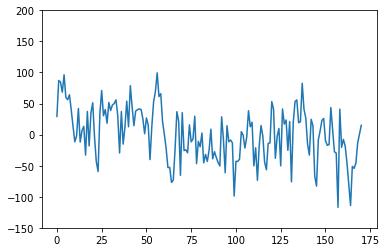

In [262]:
d63=hundred(d_returns6[3])

plt.plot(d63)
plt.ylim(-150,200)
plt.show()

In [263]:
ave_returns(d_average_re3,d_average_re6,d_average_re9,holding)
    

-11.734597227829818

In [264]:
ave_re_d=ave_returns(d_average_re3,d_average_re6,d_average_re9,holding)
ave_re_d

-11.734597227829818

In [265]:
(ave_re_t+ave_re_c+ave_re_d)/3

-45.019801433834395

In [266]:
print(kurtosis(d63))
print(skew(d63))

-0.2838378765112446
-0.1894547928565018


## ARIMA

In [267]:
len(t_returns6[3])

171

In [268]:
#look back 6, hold 3
t_returns6_data = pd.DataFrame(t_returns6[3],columns=['return'])
t_returns6_data 

,return
0,0.047118
1,0.745062
2,0.638227
3,1.232749
4,1.167463
...,...
166,-0.849878
167,-0.940214
168,-0.956766
169,0.379744


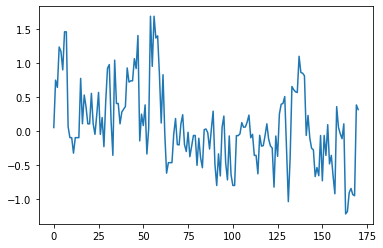

In [269]:
#look back 6, hold 3 time-series
t_returns63_data = pd.DataFrame(t_returns6[3],columns=['return']) 
plt.plot(t_returns63_data)

In [270]:
datetime_1 = pd.date_range('2008-02-01', periods=171, tz='Australia/Sydney', freq='M')
t_returns63_data['Date']=datetime_1
print(t_returns63_data.dtypes)
t_returns63_data = t_returns63_data.set_index('Date')


return                             float64
Date      datetime64[ns, Australia/Sydney]
dtype: object


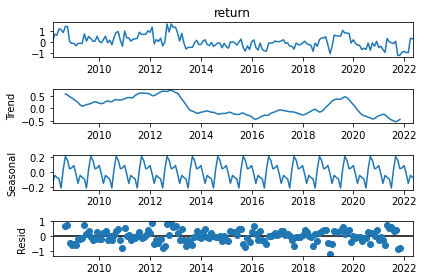

In [271]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(t_returns63_data['return'])
result.plot()
plt.show()
 

/Users/kainagasawa/miniforge3/envs/env_ds1/lib/python3.9/site-packages/pmdarima/utils/visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


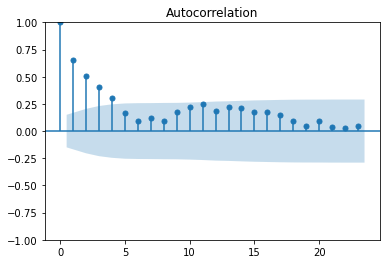

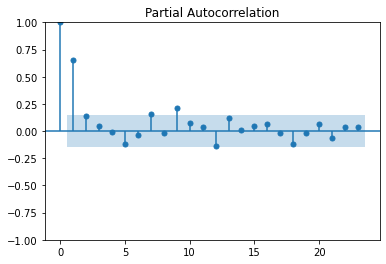

In [272]:
utils.plot_acf(t_returns63_data, alpha=.05)
utils.plot_pacf(t_returns63_data, alpha=.05)

In [273]:
train_t63, test_t63 = model_selection.train_test_split(t_returns63_data, train_size=120)


In [274]:
print('d =', arima.ndiffs(train_t63)) #d
print('D =', arima.nsdiffs(train_t63,m=12)) #D

d = 1
D = 0


In [275]:
arima_model_t = pm.auto_arima(train_t63, 
                            seasonal=True,
                            start_p=1, start_q=1,
                           max_p=5, max_q=5, m=12,
                           start_P=0, d=1,D=0, 
                            trace=True,
                            n_jobs=-1,
                            maxiter=20)

/Users/kainagasawa/miniforge3/envs/env_ds1/lib/python3.9/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=143.491, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=163.920, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=155.155, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=151.168, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=161.920, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=141.461, Time=0.03 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=143.072, Time=0.09 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=144.401, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=149.286, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=154.131, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=150.026, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=148.238, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=148.682, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=151.205, Time=0.01 sec
 ARIMA(2,1,2)(0,0,0)[12] intercep

51
MAE:
0.5100651699078785
WAPE
103.42257350079403
MAPE(%):
199.73944798817882


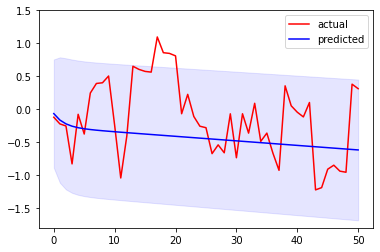

In [276]:
import math
month_t63=np.array(test_t63['return'])
print(month_t63.shape[0])
preds_t63, conf_int_t63 = arima_model_t.predict(n_periods=month_t63.shape[0], return_conf_int=True)



print('MAE:')
print(mean_absolute_error(month_t63, preds_t63)) 
print('WAPE')
print((sum(abs(month_t63-preds_t63))/sum(abs(month_t63)))*100)
print('MAPE(%):')
print(mean(abs((month_t63*100-preds_t63*100)/(month_t63*100)))*100)

x_axis = np.arange(preds_t63.shape[0])
plt.plot(x_axis,test_t63,label="actual",color='r') 
plt.plot(x_axis,preds_t63,label="predicted",color='b')
plt.fill_between(x_axis[-preds_t63.shape[0]:],
                 conf_int_t63[:, 0], conf_int_t63[:, 1],
                 alpha=0.1, color='b')
plt.ylim(-1.8,1.5)
plt.legend()
plt.show()

In [277]:
mean(list(test_t63['return']))

-0.13803030389568685

In [281]:
abs(month_t63[0]-preds_t63[0])/abs(month_t63[0])

0.4493763176742398

In [282]:
(sum(abs(month_t63-preds_t63))/sum(abs(month_t63)))*100

103.42257350079403

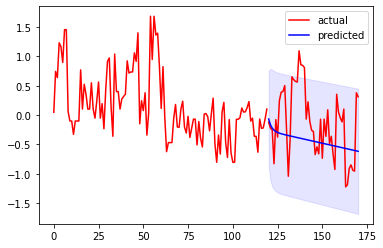

In [283]:
x_axis = np.arange(train_t63.shape[0] + preds_t63.shape[0])
plt.plot(x_axis[:train_t63.shape[0]],train_t63,color='r',label="actual")
plt.plot(x_axis[train_t63.shape[0]:],test_t63,color='r')
plt.plot(x_axis[train_t63.shape[0]:],preds_t63,color='b',label="predicted")
plt.fill_between(x_axis[-preds_t63.shape[0]:],
                 conf_int_t63[:, 0], conf_int_t63[:, 1],
                 alpha=0.1,color='b')
plt.legend()
plt.show()


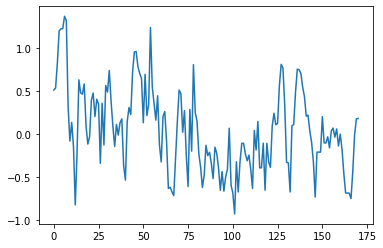

In [284]:
#look back 6, hold 3 cross-section
c_returns63_data = pd.DataFrame(c_returns6[3],columns=['return'])
plt.plot(c_returns63_data)

In [285]:
len(c_returns63_data)

171

In [286]:
datetime_2 = pd.date_range('2008-05-01', periods=171, tz='Australia/Sydney', freq='M')
c_returns63_data['Date']=datetime_2
print(c_returns63_data.dtypes)
c_returns63_data = c_returns63_data.set_index('Date')



return                             float64
Date      datetime64[ns, Australia/Sydney]
dtype: object


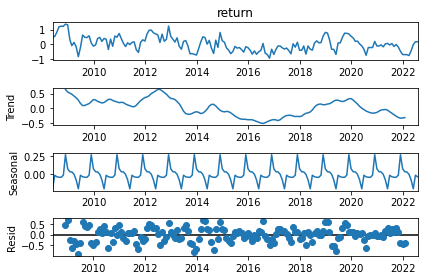

In [287]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(c_returns63_data['return'])
result.plot()
plt.show()
 

/Users/kainagasawa/miniforge3/envs/env_ds1/lib/python3.9/site-packages/pmdarima/utils/visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


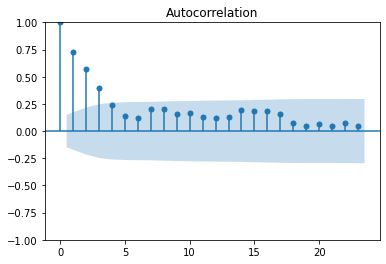

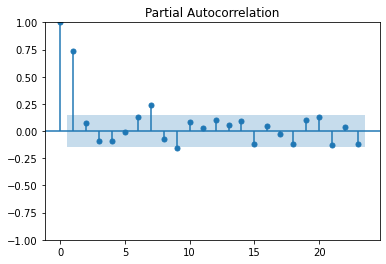

In [288]:
utils.plot_acf(c_returns63_data, alpha=.05)
utils.plot_pacf(c_returns63_data, alpha=.05)

In [289]:
train_c63, test_c63 = model_selection.train_test_split(c_returns63_data, train_size=120)

In [290]:
mean(list(test_c63['return']))

-0.0038833648356273952

In [291]:
print('d =', arima.ndiffs(train_c63)) #d
print('D =', arima.nsdiffs(train_c63,m=12)) #D

d = 1
D = 0


In [292]:
arima_model_c = pm.auto_arima(train_c63, 
                            seasonal=True,
                            start_p=1, start_q=1,
                           max_p=5, max_q=5, m=12,
                           start_P=0, d=1, D=0, 
                            trace=True,
                            n_jobs=-1,
                            maxiter=20)

/Users/kainagasawa/miniforge3/envs/env_ds1/lib/python3.9/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=100.594, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=114.145, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=109.126, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=107.963, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=112.167, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=96.017, Time=0.08 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=99.316, Time=0.07 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=96.872, Time=0.22 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=94.800, Time=0.24 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=92.389, Time=0.19 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=103.977, Time=0.11 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=105.383, Time=0.10 sec
 ARIMA(2,1,1)(0,0,2)[12] intercept   : AIC=97.160, Time=0.20 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=

(51,)
MAE:
0.5621779623560628
WAPE
175.42264220582712
MAPE(%):
1219.9333935447012


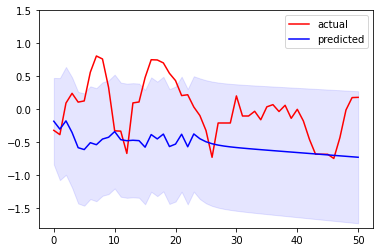

In [294]:
month_c63=np.array(test_c63['return'])
print(month_c63.shape)
preds_c63, conf_int_c63 = arima_model_c.predict(n_periods=month_c63.shape[0], return_conf_int=True)



print('MAE:')
print(mean_absolute_error(month_c63, preds_c63)) 
print('WAPE')
print((sum(abs(month_c63-preds_c63))/sum(abs(month_c63)))*100)
print('MAPE(%):')
print(mean(abs((preds_c63*100-month_c63*100)/(month_c63*100)))*100)

x_axis = np.arange(preds_c63.shape[0])
plt.plot(x_axis,test_c63,label="actual",color='r') 
plt.plot(x_axis,preds_c63,label="predicted",color='b')
plt.fill_between(x_axis[-preds_c63.shape[0]:],
                 conf_int_c63[:, 0], conf_int_c63[:, 1],
                 alpha=0.1, color='b')
plt.ylim(-1.8,1.5)
plt.legend()
plt.show()

In [295]:
(sum(abs(month_c63-preds_c63))/sum(abs(month_c63)))*100

175.42264220582712

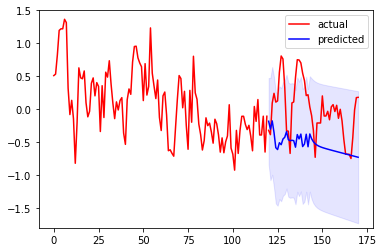

In [296]:
x_axis = np.arange(train_c63.shape[0] + preds_c63.shape[0])
plt.plot(x_axis[:train_c63.shape[0]],train_c63,color='r',label="actual")
plt.plot(x_axis[train_c63.shape[0]:],test_c63,color='r')
plt.plot(x_axis[train_c63.shape[0]:],preds_c63,color='b',label="predicted")
plt.fill_between(x_axis[-preds_c63.shape[0]:],
                 conf_int_c63[:, 0], conf_int_c63[:, 1],
                 alpha=0.1,color='b')

plt.ylim(-1.8,1.5)
plt.legend()
plt.show()


## dual

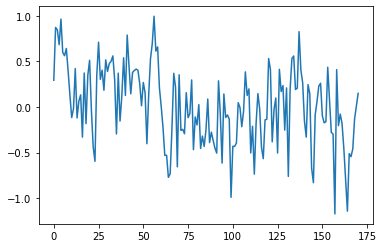

In [297]:
#look back 6, hold 3 time-series
d_returns63_data = pd.DataFrame(d_returns6[3],columns=['return']) 
plt.plot(d_returns63_data)

In [298]:
datetime_2 = pd.date_range('2008-05-01', periods=171, tz='Australia/Sydney', freq='M')
d_returns63_data['Date']=datetime_2
print(d_returns63_data.dtypes)
d_returns63_data = d_returns63_data.set_index('Date')

return                             float64
Date      datetime64[ns, Australia/Sydney]
dtype: object


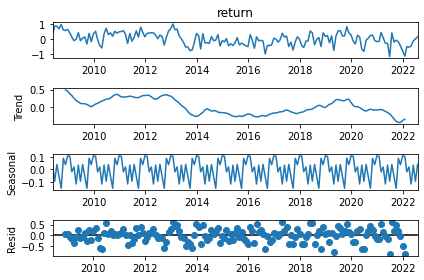

In [299]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(d_returns63_data['return'])
result.plot()
plt.show()
 

In [300]:
train_d63, test_d63 = model_selection.train_test_split(d_returns63_data, train_size=110)

In [301]:
print('d =', arima.ndiffs(train_d63)) #d
print('D =', arima.nsdiffs(train_d63,m=9)) #D

d = 1
D = 0


In [302]:
arima_model_d = pm.auto_arima(train_d63, 
                            seasonal=True,
                            start_p=1, start_q=1,
                           max_p=5, max_q=5, m=12,
                           start_P=0, d=1, D=0, 
                            trace=True,
                            n_jobs=-1,
                            maxiter=20)

Performing stepwise search to minimize aic


/Users/kainagasawa/miniforge3/envs/env_ds1/lib/python3.9/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=77.278, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=106.061, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=90.765, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=82.175, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=104.061, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=77.875, Time=0.04 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=80.252, Time=0.10 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=81.864, Time=0.19 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=77.499, Time=0.08 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=84.785, Time=0.21 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=90.253, Time=0.03 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=83.297, Time=0.09 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=78.969, Time=0.08 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=104.494, Time=0.03 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=81.810, Time=0.08 sec
 ARIMA(2,1,0)(0,0,1)[1

(61,)
MAE:
0.4465922790148767
WAPE
129.68035650632515
MAPE(%):
349.8507045777343


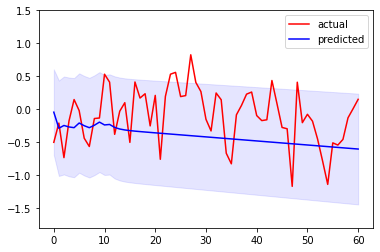

In [303]:
month_d63=np.array(test_d63['return'])
print(month_d63.shape)
preds_d63, conf_int_d63 = arima_model_d.predict(n_periods=month_d63.shape[0], return_conf_int=True)


print('MAE:')
print(mean_absolute_error(month_d63, preds_d63)) 
print('WAPE')
print((sum(abs(month_d63-preds_d63))/sum(abs(month_d63)))*100)
print('MAPE(%):')
print(mean(abs((preds_d63*100-month_d63*100)/(month_d63*100)))*100)

x_axis = np.arange(preds_d63.shape[0])
plt.plot(x_axis,test_d63,label="actual",color='r') 
plt.plot(x_axis,preds_d63,label="predicted",color='b')
plt.fill_between(x_axis[-preds_d63.shape[0]:],
                 conf_int_d63[:, 0], conf_int_d63[:, 1],
                 alpha=0.1, color='b')
plt.ylim(-1.8,1.5)
plt.legend()
plt.show()

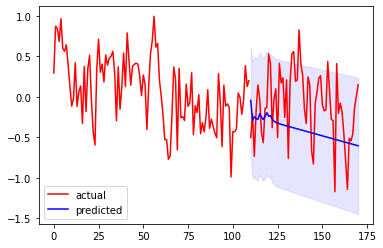

In [304]:
x_axis = np.arange(train_d63.shape[0] + preds_d63.shape[0])
plt.plot(x_axis[:train_d63.shape[0]],train_d63,color='r',label="actual")
plt.plot(x_axis[train_d63.shape[0]:],test_d63,color='r')
plt.plot(x_axis[train_d63.shape[0]:],preds_d63,color='b',label="predicted")
plt.fill_between(x_axis[-preds_d63.shape[0]:],
                 conf_int_d63[:, 0], conf_int_d63[:, 1],
                 alpha=0.1,color='b')
plt.legend()
plt.show()

# before covid

## time series

In [305]:
'''
re_dict2={}
for d in range(len(df_name)):
    re_dict2[df_name[d]]=dfs[d]['Change %'][:150]
    
'''

"\nre_dict2={}\nfor d in range(len(df_name)):\n    re_dict2[df_name[d]]=dfs[d]['Change %'][:150]\n    \n"

In [306]:
re_dict2={}
for d in range(len(df_name)):
    re_dict2[df_name[d]]=np.log((dfs[d]['Change %'][:150]+100)/100)

In [307]:
rawre_dict2={}
for i in key:
    rawre_dict2[i]= rawre_dict[i][:150]
   

In [308]:
len(re_dict2['ko'])

150

In [309]:
#time-series look back 3-month
    
win_t3p={}
lose_t3p={}

for i in range(3,150):   
    
    key=list(re_dict2.keys())
    value=[]
    for n in key:
        cum_return=[1+re_dict2[n][i+t-3] for t in range(3)]
        value.append(np.prod(cum_return)-1)           
               
    r_dict=dict(zip(key,value))
    
    positive={}
    negative={}
    
    for j in key:
        if r_dict[j]>0:
            positive[j]=re_dict2[j][i]
        else:
            negative[j]=re_dict2[j][i]
            
    #win_return = sum(positive.values())
    #lose_return = sum(negative.values())

    win_t3p[i-3]=list(positive.keys())
    lose_t3p[i-3]=list(negative.keys())
            
        
#time-series look back 6-month
win_t6p={}
lose_t6p={}

for i in range(6,150):   
    
    key=list(re_dict2.keys())
    value=[]
    for n in key:
        cum_return=[1+re_dict2[n][i+t-6] for t in range(6)]
        value.append(np.prod(cum_return)-1)           
               
    r_dict=dict(zip(key,value))
    
    positive={}
    negative={}
    
    for j in key:
        if r_dict[j]>0:
            positive[j]=re_dict2[j][i]
        else:
            negative[j]=re_dict2[j][i]
            
    #win_return = sum(positive.values())
    #lose_return = sum(negative.values())

    win_t6p[i-6]=list(positive.keys())
    lose_t6p[i-6]=list(negative.keys())

#time-series look back 9-month
win_t9p={}
lose_t9p={}

for i in range(9,150):   
    
    key=list(re_dict2.keys())
    value=[]
    for n in key:
        cum_return=[1+re_dict2[n][i+t-9] for t in range(9)]
        value.append(np.prod(cum_return)-1)           
               
    r_dict=dict(zip(key,value))
    
    positive={}
    negative={}
    
    for j in key:
        if r_dict[j]>0:
            positive[j]=re_dict2[j][i]
        else:
            negative[j]=re_dict2[j][i]
            
    #win_return = sum(positive.values())
    #lose_return = sum(negative.values())

    win_t9p[i-9]=list(positive.keys())
    lose_t9p[i-9]=list(negative.keys())
            

In [315]:
#returns for look back 3-month
t_returns3p=n_returns(win_t3p,lose_t3p,3,holding)
#t_returns3p

In [316]:
#returns for look back 6-month
t_returns6p=n_returns(win_t6p,lose_t6p,6,holding)
#t_returns6p

In [317]:
#returns for look back 9-month
t_returns9p=n_returns(win_t9p,lose_t9p,9,holding)
#t_returns9p

In [318]:
#look back=3, holding3,6,9,12 average return
t_average_re3p=ave_return(t_returns3p,holding)
t_average_re3p

{3: -31.728657762865286,
 6: -25.650842117849088,
 9: -75.92155287753344,
 12: -139.8181703554329}

In [319]:
#look back=6, holding3,6,9,12 average return
t_average_re6p=ave_return(t_returns6p,holding)
t_average_re6p

{3: 16.090813723578663,
 6: -47.26675638850113,
 9: -137.03577924811995,
 12: -194.97636029644121}

In [320]:
#look back=9, holding3,6,9,12 average return
t_average_re9p=ave_return(t_returns9p,holding)
t_average_re9p

{3: -75.40698500729125,
 6: -164.02141406039505,
 9: -227.30230665448025,
 12: -179.78524979083187}

In [321]:
ave_returns(t_average_re3p,t_average_re6p,t_average_re9p,holding)
    

-106.90193840301356

In [322]:
ave_re_tp=ave_returns(t_average_re3p,t_average_re6p,t_average_re9p,holding)
ave_re_tp

-106.90193840301356

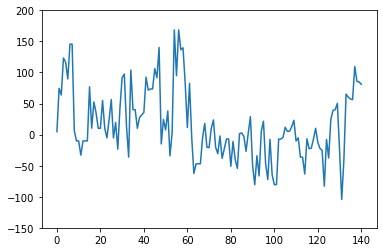

In [323]:
t63p=hundred(t_returns6p[3])

plt.plot(t63p)
plt.ylim(-150,200)
plt.show()

In [324]:
print(kurtosis(t63p))
print(skew(t63p))

-0.014201646839095972
0.5881549759055769


## cross sectional

In [325]:

win_c3p={}
lose_c3p={}

for i in range(3,len((re_dict2['ko']))):
    
    key=list(re_dict2.keys())
    value=[]
    for n in key:
        cum_return=[1+re_dict2[n][i+t-3] for t in range(3)]
        value.append(np.prod(cum_return)-1)    
    r_dict=dict(zip(key,value))
    
    winners={}
    losers={}
    
    r_dict=dict(sorted(r_dict.items(), key=lambda item: item[1]))
    key_s=list(r_dict.keys())
    value_s=list(r_dict.values())
    
    for j in range(3):
        winners[key_s[-(j+1)]]=value_s[-(j+1)]
        losers[key_s[j]]=value_s[j]
        
    #win_return = sum(winners.values())
    #lose_return = sum(losers.values())

    win_c3p[i-3]=list(winners.keys()) 
    lose_c3p[i-3]=list(losers.keys())
    

win_c6p={}
lose_c6p={}

for i in range(6,len((re_dict2['ko']))):
    
    key=list(re_dict2.keys())
    value=[]
    for n in key:
        cum_return=[1+re_dict2[n][i+t-6] for t in range(6)]
        value.append(np.prod(cum_return)-1)              
               
    r_dict=dict(zip(key,value))
    
    winners={}
    losers={}
    
    r_dict=dict(sorted(r_dict.items(), key=lambda item: item[1]))
    key_s=list(r_dict.keys())
    value_s=list(r_dict.values())
    
    for j in range(3):
        winners[key_s[-(j+1)]]=value_s[-(j+1)]
        losers[key_s[j]]=value_s[j]
        
    #win_return = sum(winners.values())
    #lose_return = sum(losers.values())

    win_c6p[i-6]=list(winners.keys()) 
    lose_c6p[i-6]=list(losers.keys())
            
win_c9p={}
lose_c9p={}

for i in range(9,len((re_dict2['ko']))):
    
    key=list(re_dict2.keys())
    value=[]
    for n in key:
        cum_return=[1+re_dict2[n][i+t-9] for t in range(9)]
        value.append(np.prod(cum_return)-1) 
    r_dict=dict(zip(key,value))
    
    winners={}
    losers={}
    
    r_dict=dict(sorted(r_dict.items(), key=lambda item: item[1]))
    key_s=list(r_dict.keys())
    value_s=list(r_dict.values())
    
    for j in range(3):
        winners[key_s[-(j+1)]]=value_s[-(j+1)]
        losers[key_s[j]]=value_s[j]
        
    #win_return = sum(winners.values())
    #lose_return = sum(losers.values())

    win_c9p[i-9]=list(winners.keys()) 
    lose_c9p[i-9]=list(losers.keys())
            
       
    

In [326]:
#look back 3-month
c_returns3p=n_returns(win_c3p,lose_c3p,3,holding)
#c_returns3p

In [327]:
#look back 6-month
c_returns6p=n_returns(win_c6p,lose_c6p,6,holding)
#c_returns6p

In [328]:
#look back 9-month
c_returns9p=n_returns(win_c9p,lose_c9p,9,holding)
#c_returns9p

In [329]:
#look back=3, holding3,6,9,12 average return
c_average_re3p=ave_return(c_returns3p,holding)
c_average_re3p

{3: -2.654398135640286,
 6: 5.666777337641566,
 9: 4.55924905061685,
 12: -9.402182337635999}

In [330]:
#look back=6, holding3,6,9,12 average return
c_average_re6p=ave_return(c_returns6p,holding)
c_average_re6p

{3: 8.771093741873772,
 6: 7.1411180829229846,
 9: -12.158765185612578,
 12: -5.016689192140739}

In [331]:
#look back=9, holding3,6,9,12 average return
c_average_re9p=ave_return(c_returns9p,holding)
c_average_re9p

{3: 2.463202325065228,
 6: -12.421642394012569,
 9: -0.647278815112915,
 12: 22.953073463216384}

In [332]:
ave_returns(c_average_re3p,c_average_re6p,c_average_re9p,holding)
    

0.7711298284318082

In [333]:
ave_re_cp=ave_returns(c_average_re3p,c_average_re6p,c_average_re9p,holding)
ave_re_cp

0.7711298284318082

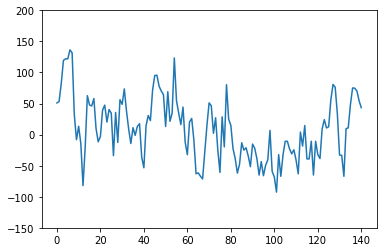

In [334]:
c63p=hundred(c_returns6p[3])

plt.plot(c63p)
plt.ylim(-150,200)
plt.show()

In [335]:
print(kurtosis(c63p))
print(skew(c63p))

-0.44291605985986715
0.33284165756831763


## dual

In [337]:
#dual look back 3-month
    
win_d3p={}
lose_d3p={}

for i in range(3,len((re_dict2['ko']))):   
    
    key=list(re_dict2.keys())
    value=[]
    for n in key:
        cum_return=[1+re_dict2[n][i+t-3] for t in range(3)]
        value.append(np.prod(cum_return)-1)             
               
    r_dict=dict(zip(key,value))
    
    positive={}
    negative={}
    
    for j in key:
        if r_dict[j]>0:
            positive[j]=re_dict2[j][i]
        else:
            negative[j]=re_dict2[j][i]
            
    winners={}
    losers={}
    
    p_dict=dict(sorted(positive.items(), key=lambda item:item[1]))
    n_dict=dict(sorted(negative.items(), key=lambda item:item[1]))
    key_p=list(p_dict.keys())
    value_p=list(p_dict.values())
    key_n=list(n_dict.keys())
    value_n=list(n_dict.values())
    
    if len(key_p)>=3:
        for j in range(3):
            winners[key_p[-(j+1)]]=value_p[-(j+1)]   
    else:
        for j in range(len(key_p)):
            winners[key_p[-(j+1)]]=value_p[-(j+1)]
    if len(key_n)>=3:
        for j in range(3):
            losers[key_n[j]]=value_n[j]
    else:
        for j in range(len(key_n)):
            losers[key_n[j]]=value_n[j]
    
    win_d3p[i-3]=list(winners.keys())
    lose_d3p[i-3]=list(losers.keys())
            
   
     
#lose_d3p

In [338]:
#dual look back 6-month
    
win_d6p={}
lose_d6p={}

for i in range(6,len((re_dict2['ko']))):   
    
    key=list(re_dict2.keys())
    value=[]
    for n in key:
        cum_return=[1+re_dict2[n][i+t-6] for t in range(6)]
        value.append(np.prod(cum_return)-1)           
               
    r_dict=dict(zip(key,value))
    
    positive={}
    negative={}
    
    for j in key:
        if r_dict[j]>0:
            positive[j]=re_dict2[j][i]
        else:
            negative[j]=re_dict2[j][i]
            
    winners={}
    losers={}
    
    p_dict=dict(sorted(positive.items(), key=lambda item:item[1]))
    n_dict=dict(sorted(negative.items(), key=lambda item:item[1]))
    key_p=list(p_dict.keys())
    value_p=list(p_dict.values())
    key_n=list(n_dict.keys())
    value_n=list(n_dict.values())
    
    if len(key_p)>=3:
        for j in range(3):
            winners[key_p[-(j+1)]]=value_p[-(j+1)]   
    else:
        for j in range(len(key_p)):
            winners[key_p[-(j+1)]]=value_p[-(j+1)]
    if len(key_n)>=3:
        for j in range(3):
            losers[key_n[j]]=value_n[j]
    else:
        for j in range(len(key_n)):
            losers[key_n[j]]=value_n[j]
    
    win_d6p[i-6]=list(winners.keys())
    lose_d6p[i-6]=list(losers.keys())
            
   
     
#lose_d6p

In [339]:
#dual look back 9-month
    
win_d9p={}
lose_d9p={}

for i in range(9,len((re_dict2['ko']))):   
    
    key=list(re_dict2.keys())
    value=[]
    for n in key:
        cum_return=[1+re_dict2[n][i+t-9] for t in range(9)]
        value.append(np.prod(cum_return)-1)     
               
    r_dict=dict(zip(key,value))
    
    positive={}
    negative={}
    
    for j in key:
        if r_dict[j]>0:
            positive[j]=re_dict2[j][i]
        else:
            negative[j]=re_dict2[j][i]
            
    winners={}
    losers={}
    
    p_dict=dict(sorted(positive.items(), key=lambda item:item[1]))
    n_dict=dict(sorted(negative.items(), key=lambda item:item[1]))
    key_p=list(p_dict.keys())
    value_p=list(p_dict.values())
    key_n=list(n_dict.keys())
    value_n=list(n_dict.values())
    
    if len(key_p)>=3:
        for j in range(3):
            winners[key_p[-(j+1)]]=value_p[-(j+1)]   
    else:
        for j in range(len(key_p)):
            winners[key_p[-(j+1)]]=value_p[-(j+1)]
    if len(key_n)>=3:
        for j in range(3):
            losers[key_n[j]]=value_n[j]
    else:
        for j in range(len(key_n)):
            losers[key_n[j]]=value_n[j]
    
    win_d9p[i-9]=list(winners.keys())
    lose_d9p[i-9]=list(losers.keys())
            
   
     
#lose_d9p

In [340]:
#returns for look back 3-month

d_returns3p=n_returns(win_d3p,lose_d3p,3,holding)

#returns for look back -month

d_returns6p=n_returns(win_d6p,lose_d6p,6,holding)
    
#returns for look back 9-month

d_returns9p=n_returns(win_d9p,lose_d9p,9,holding)
    
    


In [341]:
#look back=3, holding3,6,9,12 average return
d_average_re3p=ave_return(d_returns3p,holding)
d_average_re3p

{3: -6.082715918897231,
 6: -0.6024680621016922,
 9: -6.382675841858464,
 12: -19.687138738686087}

In [342]:
#look back=6, holding3,6,9,12 average return
d_average_re6p=ave_return(d_returns6p,holding)
d_average_re6p

{3: 6.495060565211352,
 6: 2.329175635714496,
 9: -17.019141538486977,
 12: -14.798498126108225}

In [343]:
#look back=9, holding3,6,9,12 average return
d_average_re9p=ave_return(d_returns9p,holding)
d_average_re9p

{3: -4.92192107902246,
 6: -15.885682792455306,
 9: -10.917009590932196,
 12: 4.525711568546171}

In [344]:
ave_returns(d_average_re3p,d_average_re6p,d_average_re9p,holding)
    

-6.912275326589719

In [345]:
ave_re_dp=ave_returns(d_average_re3p,d_average_re6p,d_average_re9p,holding)
ave_re_dp

-6.912275326589719

In [346]:
(ave_re_tp+ave_re_cp+ave_re_dp)/3

-37.681027967057155

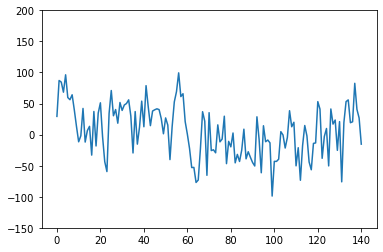

In [347]:
d63p=hundred(d_returns6p[3])

plt.plot(d63p)
plt.ylim(-150,200)
plt.show()

In [348]:
print(kurtosis(d63p))
print(skew(d63p))

-0.6024814361092492
-0.09562464497021086


## arima

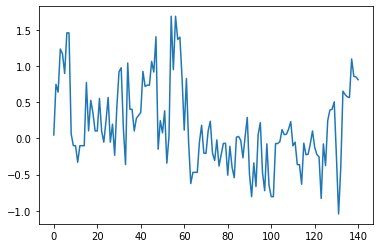

In [349]:
#look back 6, hold 3 time-series
t_returns63p_data = pd.DataFrame(t_returns6p[3],columns=['return']) 
plt.plot(t_returns63p_data)

In [350]:
datetime_2 = pd.date_range('2008-05-01', periods=141, tz='Australia/Sydney', freq='M')
t_returns63p_data['Date']=datetime_2
print(t_returns63p_data.dtypes)
t_returns63p_data = t_returns63p_data.set_index('Date')

return                             float64
Date      datetime64[ns, Australia/Sydney]
dtype: object


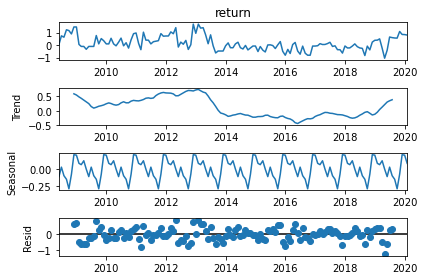

In [351]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(t_returns63p_data['return'])
result.plot()
plt.show()
 

In [352]:
train_t63p, test_t63p = model_selection.train_test_split(t_returns63p_data, train_size=100)

In [353]:
print('d =', arima.ndiffs(train_t63p)) #d
print('D =', arima.nsdiffs(train_t63p,m=12)) #D

d = 1
D = 0


In [354]:
arima_model_tp = pm.auto_arima(train_t63p, 
                            seasonal=True,
                            start_p=1, start_q=1,
                           max_p=5, max_q=5, m=12,
                           start_P=0, d=1, D=0, 
                            trace=True,
                            n_jobs=-1,
                            maxiter=20)

Performing stepwise search to minimize aic


/Users/kainagasawa/miniforge3/envs/env_ds1/lib/python3.9/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=133.925, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=150.328, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=143.582, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=139.377, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=148.347, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=131.806, Time=0.02 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=135.965, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=137.388, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=141.836, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=134.457, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=137.051, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=136.849, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=139.316, Time=0.01 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(1,1,1)(0,0,

(41,)
MAE:
0.4521686259391271
WAPE
118.02779183391219
MAPE(%):
192.9243222916663


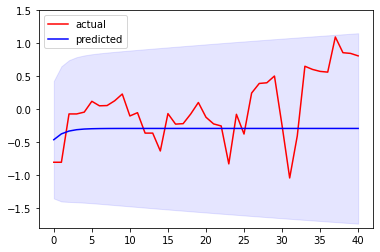

In [355]:
month_t63p=np.array(test_t63p['return'])
print(month_t63p.shape)
preds_t63p, conf_int_t63p = arima_model_tp.predict(n_periods=month_t63p.shape[0], return_conf_int=True)


# 
print('MAE:')
print(mean_absolute_error(month_t63p, preds_t63p)) 
print('WAPE')
print((sum(abs(month_t63p-preds_t63p))/sum(abs(month_t63p)))*100)
print('MAPE(%):')
print(mean(abs((preds_t63p*100-month_t63p*100)/(month_t63p*100)))*100)

# 
x_axis = np.arange(preds_t63p.shape[0])
plt.plot(x_axis,test_t63p,label="actual",color='r') 
plt.plot(x_axis,preds_t63p,label="predicted",color='b')
plt.fill_between(x_axis[-preds_t63p.shape[0]:],
                 conf_int_t63p[:, 0], conf_int_t63p[:, 1],alpha=0.1, color='b')

plt.ylim(-1.8,1.5)
plt.legend()
plt.show()

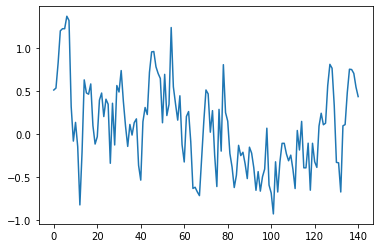

In [357]:
#look back 6, hold 3 cross
c_returns63p_data = pd.DataFrame(c_returns6p[3],columns=['return']) 
plt.plot(c_returns63p_data)

In [358]:
datetime_2 = pd.date_range('2008-05-01', periods=141, tz='Australia/Sydney', freq='M')
c_returns63p_data['Date']=datetime_2
print(c_returns63p_data.dtypes)
c_returns63p_data = c_returns63p_data.set_index('Date')

return                             float64
Date      datetime64[ns, Australia/Sydney]
dtype: object


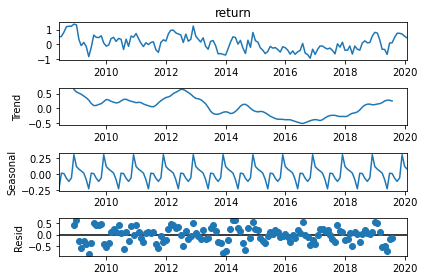

In [359]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(c_returns63p_data['return'])
result.plot()
plt.show()
 

In [360]:
train_c63p, test_c63p = model_selection.train_test_split(c_returns63p_data, train_size=100)

In [361]:
print('d =', arima.ndiffs(train_c63p)) #d
print('D =', arima.nsdiffs(train_c63p,m=12)) #D

d = 1
D = 0


In [362]:
arima_model_cp = pm.auto_arima(train_c63p, 
                            seasonal=True,
                            start_p=1, start_q=1,
                           max_p=5, max_q=5, m=12,
                           start_P=0, d=1, D=0, 
                            trace=True,
                            n_jobs=-1,
                            maxiter=20)

Performing stepwise search to minimize aic


/Users/kainagasawa/miniforge3/envs/env_ds1/lib/python3.9/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=89.027, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=99.272, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=97.461, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=96.836, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=97.352, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=84.053, Time=0.10 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=85.785, Time=0.07 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=86.537, Time=0.18 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=86.486, Time=0.16 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=85.414, Time=0.16 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=82.644, Time=0.18 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=92.259, Time=0.09 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=93.031, Time=0.11 sec
 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=84.443, Time=0.24 sec
 ARIMA(1,1,2)(2,0,0)[12] int

(41,)
MAE:
0.6117691277305651
WAPE
157.6134380842466
MAPE(%):
262.0510885044549


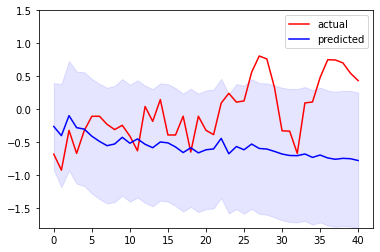

In [363]:
month_c63p=np.array(test_c63p['return'])
print(month_c63p.shape)
preds_c63p, conf_int_c63p = arima_model_cp.predict(n_periods=month_c63p.shape[0], return_conf_int=True)



print('MAE:')
print(mean_absolute_error(month_c63p, preds_c63p)) 
print('WAPE')
print((sum(abs(month_c63p-preds_c63p))/sum(abs(month_c63p)))*100)
print('MAPE(%):')
print(mean(abs((preds_c63p*100-month_c63p*100)/(month_c63p*100)))*100)

x_axis = np.arange(preds_c63p.shape[0])
plt.plot(x_axis,test_c63p,label="actual",color='r') 
plt.plot(x_axis,preds_c63p,label="predicted",color='b')
plt.fill_between(x_axis[-preds_c63p.shape[0]:],
                 conf_int_c63p[:, 0], conf_int_c63p[:, 1],
                alpha=0.1, color='b')

plt.ylim(-1.8,1.5)
plt.legend()
plt.show()

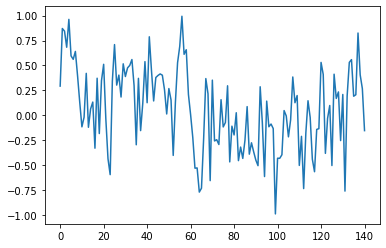

In [364]:
#look back 6, hold 3 dual
d_returns63p_data = pd.DataFrame(d_returns6p[3],columns=['return']) 
plt.plot(d_returns63p_data)

In [365]:
datetime_2 = pd.date_range('2008-05-01', periods=141, tz='Australia/Sydney', freq='M')
d_returns63p_data['Date']=datetime_2
print(d_returns63p_data.dtypes)
d_returns63p_data = d_returns63p_data.set_index('Date')

return                             float64
Date      datetime64[ns, Australia/Sydney]
dtype: object


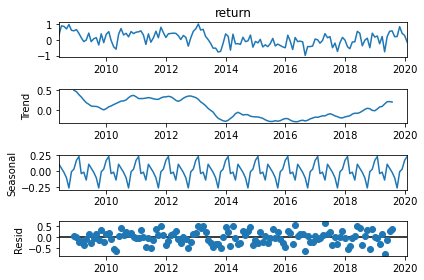

In [366]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(d_returns63p_data['return'])
result.plot()
plt.show()
 

In [367]:
train_d63p, test_d63p = model_selection.train_test_split(d_returns63p_data, train_size=100)

In [368]:
print('d =', arima.ndiffs(train_d63p)) #d
print('D =', arima.nsdiffs(train_d63p,m=12)) #D

d = 1
D = 0


In [369]:
arima_model_dp = pm.auto_arima(train_d63p, 
                            seasonal=True,
                            start_p=1, start_q=1,
                           max_p=5, max_q=5, m=12,
                           start_P=0, d=1, D=0, 
                            trace=True,
                            n_jobs=-1,
                            maxiter=20)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=74.501, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=100.854, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=88.146, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=80.642, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=98.960, Time=0.00 sec


/Users/kainagasawa/miniforge3/envs/env_ds1/lib/python3.9/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=74.963, Time=0.04 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=76.789, Time=0.09 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=81.908, Time=0.16 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=75.441, Time=0.07 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=82.348, Time=0.20 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=87.774, Time=0.03 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=80.420, Time=0.07 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=99.985, Time=0.03 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=79.342, Time=0.06 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=84.591, Time=0.04 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(1,1,1)(0,0,1)[12]             : AIC=76.811, Time=0.06 sec

Best model:  ARIMA(1,1,1)(0,0,1)[12] intercept
Total fit time: 1.201 seconds


(41,)
MAE:
0.5251832705964592
WAPE
169.69212275197626
MAPE(%):
414.5471206837512


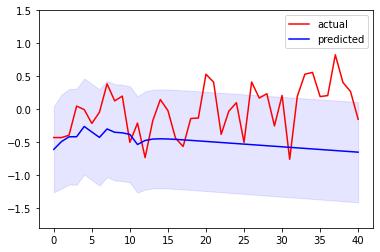

In [370]:
month_d63p=np.array(test_d63p['return'])
print(month_d63p.shape)
preds_d63p, conf_int_d63p = arima_model_dp.predict(n_periods=month_d63p.shape[0], return_conf_int=True)



print('MAE:')
print(mean_absolute_error(month_d63p, preds_d63p)) 
print('WAPE')
print((sum(abs(month_d63p-preds_d63p))/sum(abs(month_d63p)))*100)
print('MAPE(%):')
print(mean(abs((preds_d63p*100-month_d63p*100)/(month_d63p*100)))*100)

x_axis = np.arange(preds_d63p.shape[0])
plt.plot(x_axis,test_d63p,label="actual",color='r') 
plt.plot(x_axis,preds_d63p,label="predicted",color='b')
plt.fill_between(x_axis[-preds_d63p.shape[0]:],
                 conf_int_d63p[:, 0], conf_int_d63p[:, 1],
                 alpha=0.1, color='b')

plt.ylim(-1.8,1.5)
plt.legend()
plt.show()

In [371]:
df_name

['ap',
 'ms',
 'am',
 'go',
 'nv',
 'br',
 'un',
 'jj',
 'jp',
 'pg',
 'xo',
 'hd',
 'cv',
 'ma',
 'ba',
 'pf',
 'co',
 'di',
 'ko']

IndexError: list index out of range

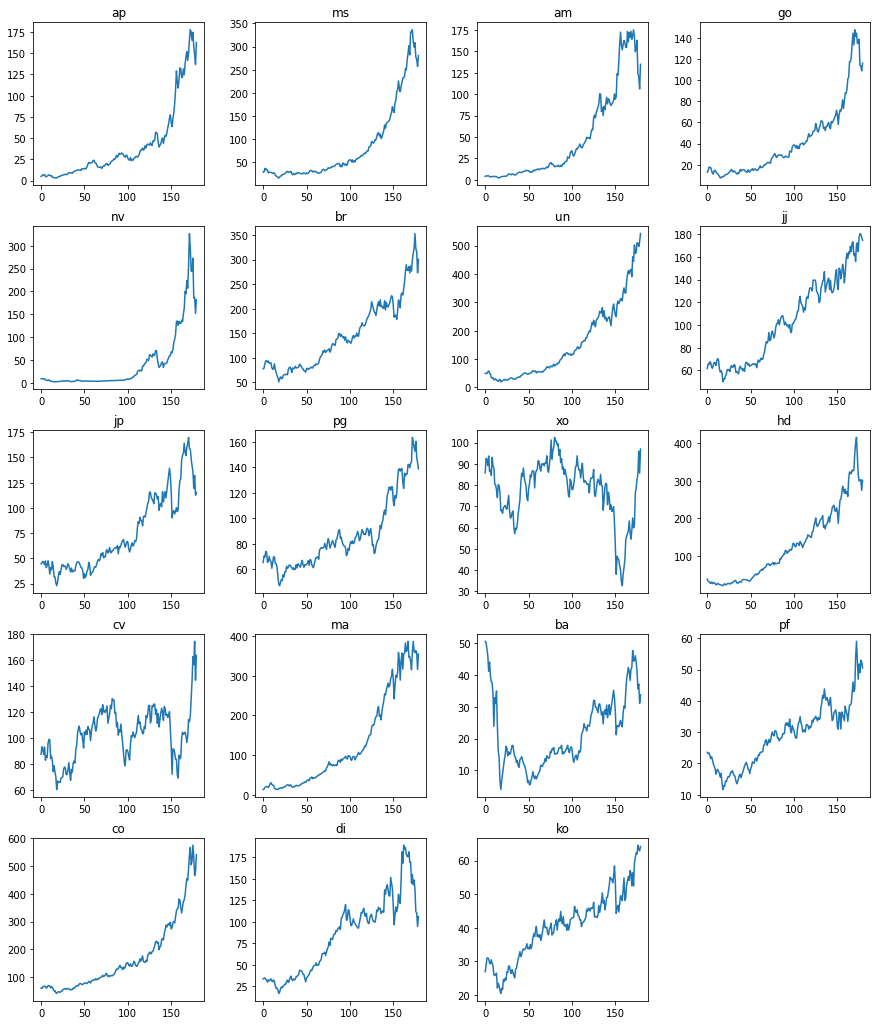

In [377]:
fig, axs, = plt.subplots(5,4,figsize=(15,18))
fig.subplots_adjust(wspace=0.3,hspace=0.25)
axs[4,3].axis('off')
num=0
for i in range(5):
    axs[i,0].plot(dfs[num]['Price'])
    axs[i,0].set_title(df_name[num])
    axs[i,1].plot(dfs[num+1]['Price'])
    axs[i,1].set_title(df_name[num+1])
    axs[i,2].plot(dfs[num+2]['Price'])
    axs[i,2].set_title(df_name[num+2])
    axs[i,3].plot(dfs[num+3]['Price'])
    axs[i,3].set_title(df_name[num+3])
    num+=4

